In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

# MODELO COMPLETO

### Constantes

In [2]:
#Conductividades: se expresan en [mS/cm^2], pero tras normalizar la ecuación quedan adimensionales
g_Na = 120
g_K = 36 
g_Cl = 0.3


#Voltajes de inversion [mV]
V_Na = 50
V_K = -77
V_Cl = -54.4

#Capacitancia (C): se expresa en [uF/cm^2], pero tras normalizar la ecuación queda en [ms] y vale 1, por lo que ni se incluye en la ecuación

### Funciones

In [3]:
#Funciones auxiliares

def inf_x(a, b):
    '''
    Devuelve el valor para t = inf en función de los coeficientes a y b
    '''
    inf = a/(a+b)
    return inf

def tau_x(a, b):
    '''
    Devuelve el parámetro tau en función de los coeficientes a y b
    '''
    tau = 1/(a+b)
    return tau

#Ecuaciones diferenciales del modelo
def derivada(t, u):
    '''
    Recibe el parámetro I y los valores actuales del vector de variables u = (v, m, h, n)
    y devuelve la derivada de cada una de dichas variables
    '''
    v = u[0]
    m = u[1]
    h = u[2]
    n = u[3]

    I = 0
    if(t >= 40 and t <=44):
        I = 4


    #v
    dv = I - g_Na*(m**3)*h*(v-V_Na) - g_K*(n**4)*(v-V_K) - g_Cl*(v-V_Cl)

    #m
    a_m = 0.1*(v+40)/(1-np.exp((-v-40)/10))
    b_m = 4*np.exp((-v-65)/18)
    inf_m = inf_x(a_m, b_m)
    tau_m = tau_x(a_m, b_m)
    dm = (inf_m - m)/tau_m

    #h
    a_h = 0.07*np.exp((-v-65)/20)
    b_h = 1/(1+np.exp((-v-35)/10))
    inf_h = inf_x(a_h, b_h)
    tau_h = tau_x(a_h, b_h)
    dh = (inf_h - h)/tau_h

    #n
    a_n = 0.01*(v+55)/(1-np.exp((-v-55)/10))
    b_n = 0.125*np.exp((-v-65)/80)
    inf_n = inf_x(a_n, b_n)
    tau_n = tau_x(a_n, b_n)
    dn = (inf_n - n)/tau_n

    du = [dv, dm, dh, dn]

    return du

### Valores iniciales (para el primer valor de corriente)

In [4]:
v0 = -60 #[mV]

a_m0 = 0.1*(v0+40)/(1-np.exp((-v0-40)/10))
b_m0 = 4*np.exp((-v0-65)/18)
m0 = inf_x(a_m0, b_m0)

a_h0 = 0.07*np.exp((-v0-65)/20)
b_h0 = 1/(1+np.exp((-v0-35)/10))
h0 = inf_x(a_h0, b_h0)

a_n0 = 0.01*(v0+55)/(1-np.exp((-v0-55)/10))
b_n0 = 0.125*np.exp((-v0-65)/80)
n0 = inf_x(a_n0, b_n0)

### Tiempos de la simulación

In [5]:
#Tiempos
t_ini = 0   #[ms]
t_fin = 100 #[ms]

### Solución numérica

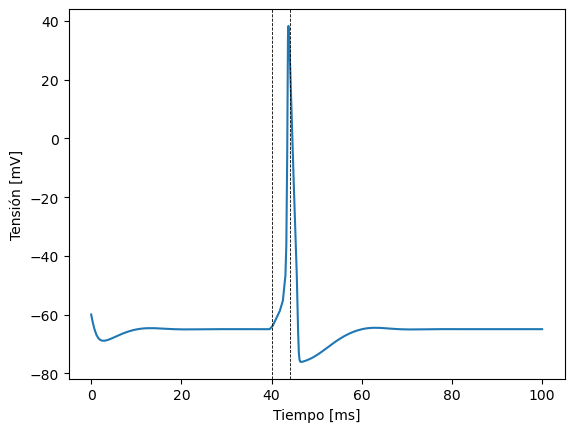

In [6]:
result = solve_ivp(lambda t, u: derivada(t, u), [t_ini, t_fin], [v0, m0, h0, n0])

#Resultados de la solución numérica
t = result.t
v = result.y[0]
m = result.y[1]
h = result.y[2]
n = result.y[3]


#Actualizo la semilla para la próxima simulación
v0 = v[-1]
m0 = m[-1]
h0 = h[-1]
n0 = n[-1]


plt.plot(t, v)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Tensión [mV]")
plt.axvline(40, ls = '--', lw = '0.6', c = 'k')
plt.axvline(44, ls = '--', lw = '0.6', c = 'k')
plt.show()